<h1>NHL Past to Present<br> COMP 2500</h1>
<h3>Tyler Snow</h3>
<p>This project uses data from the 1967-68 season to the 2015-16 season. It uses two different data sets: one being the total season data; the other, player data.</p>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.interpolate
import numpy as np
import math

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

<h1>Season Data</h1>

In [2]:
df=pd.DataFrame.from_csv('data/NHLSeasonData.csv')
df.to_csv('data/NHLSeasonData.csv',float_format='%.3f')

In [3]:
df.columns

Index(['TotalGames', 'G', 'A', 'PIM', 'ESG', 'PPG', 'SHG', 'Shot', 'GPG',
       'APG', 'PIM/G', 'ESG/G', 'PPG/G', 'SHG/G', 'SPG', 'RegGames',
       'PlayGames', 'NumTeams'],
      dtype='object')

In [4]:
df.nlargest(10,'G')

,TotalGames,G,A,PIM,ESG,PPG,SHG,Shot,GPG,APG,PIM/G,ESG/G,PPG/G,SHG/G,SPG,RegGames,PlayGames,NumTeams
Season,,,,,,,,,,,,,,,,,,
2005-06,1313,7442,12806,38458,4579,2545,318,73744,6.050,10.411,31.267,3.723,2.069,0.259,59.954,1230,83,30
1992-93,1092,7311,12224,44795,4918,2081,312,62464,7.253,12.127,44.439,4.879,2.064,0.310,61.968,1008,84,24
2006-07,1311,7082,12332,33684,4715,2099,268,72775,5.758,10.026,27.385,3.833,1.707,0.218,59.167,1230,81,30
1993-94,1182,7081,11747,44629,4801,1973,307,66170,6.484,10.757,40.869,4.397,1.807,0.281,60.595,1092,90,26
2008-09,1317,7006,12087,33406,4833,1938,235,74298,5.696,9.827,27.159,3.929,1.576,0.191,60.405,1230,87,30
2009-10,1319,6803,11717,30799,4948,1664,191,74567,5.531,9.526,25.040,4.023,1.353,0.155,60.624,1230,89,30
2000-01,1316,6781,11504,36653,4637,1877,267,68162,5.513,9.353,29.799,3.770,1.526,0.217,55.416,1230,86,30
1981-82,911,6741,11103,32866,5015,1532,194,52191,8.025,13.218,39.126,5.970,1.824,0.231,62.132,840,71,21
2010-11,1319,6721,11486,29395,4944,1571,206,74757,5.464,9.338,23.898,4.020,1.277,0.167,60.778,1230,89,30


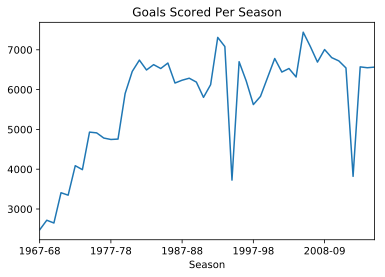

In [39]:
df['G'].plot()
plt.title('Goals Scored Per Season')

<p>The 1992-93, 1994-95, and 2012-13 seasons were all shortened due to a player strike. The 2004-2005 Season was not played for the same reasons</p>

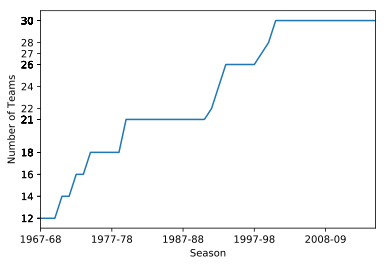

In [6]:
df['NumTeams'].plot(yticks=df['NumTeams'])
plt.ylabel('Number of Teams')

<p>In 1967 the NHL double from 6 to 12 teams has continued to expand since.</p>

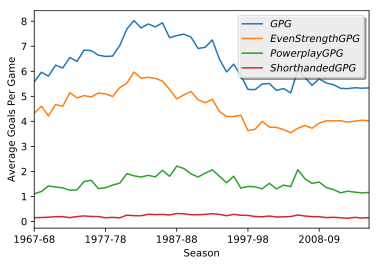

In [7]:
df['GPG'].plot()
df['ESG/G'].plot()
df['PPG/G'].plot()
df['SHG/G'].plot()
plt.ylabel('Average Goals Per Game')
leg=['$GPG$', '$EvenStrengthGPG$', '$PowerplayGPG$','$ShorthandedGPG$']
plt.legend( leg, shadow=True, loc='upper right')

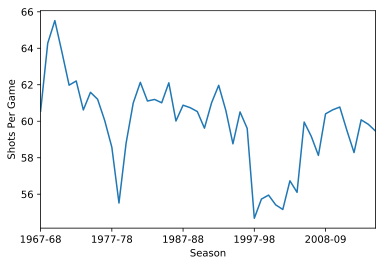

In [8]:
df['SPG'].plot()
plt.xlabel('Season')
plt.ylabel('Shots Per Game')

In [9]:
df['SPG'].describe()

count    48.000000
mean     59.863000
std       2.369072
min      54.681000
25%      58.785500
50%      60.457000
75%      61.036000
max      65.518000
Name: SPG, dtype: float64

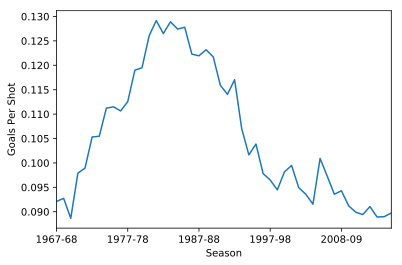

In [10]:
(df['GPG']/df['SPG']).plot()
plt.ylabel('Goals Per Shot')

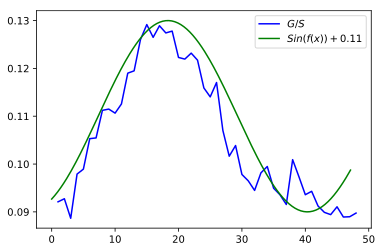

In [11]:
ndf = pd.DataFrame({'G/S':(df['GPG']/df['SPG'])}).reset_index()
x=np.arange(len(ndf.index))+1
y=ndf['G/S']
xi = np.linspace(0, 15*math.pi, 200)
yi =0.02*(np.sin((xi/7)-math.pi/3))+0.11
plt.plot(x, y, 'b')
plt.plot(xi, yi, 'g')
leg=['$G/S$', '$Sin(f(x))+0.11$']
plt.legend(leg)

<p>Perhaps over the next few years the trend will continue.</p>

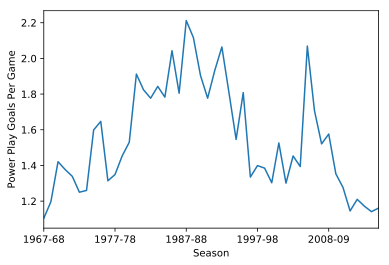

In [12]:
df['PPG/G'].plot()
plt.ylabel('Power Play Goals Per Game')

In [13]:
df['GPG'].nlargest(10)

Season
1981-82    8.025
1985-86    7.937
1983-84    7.889
1984-85    7.774
1982-83    7.730
1980-81    7.687
1988-89    7.483
1987-88    7.424
1989-90    7.368
1986-87    7.339
Name: GPG, dtype: float64

In [14]:
df['GPG'].nsmallest(10)

Season
2003-04    5.136
2001-02    5.237
1998-99    5.266
1997-98    5.276
2012-13    5.307
2002-03    5.309
2011-12    5.320
2014-15    5.324
2015-16    5.337
2013-14    5.342
Name: GPG, dtype: float64

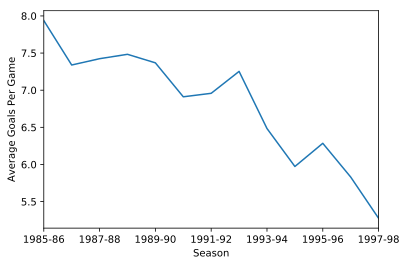

In [15]:
df['GPG']['1985-86':'1997-98'].plot()
plt.ylabel('Average Goals Per Game')

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 10 Text xticklabel objects>)

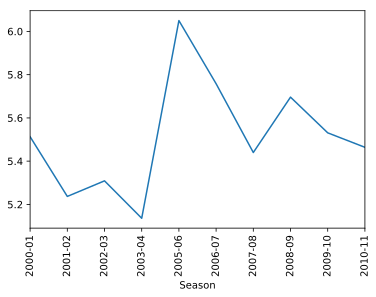

In [16]:
df['GPG']['2000-01':'2010-11'].plot()
plt.xticks(rotation=90)

<p>Notice the large spike in goals per game in 2005-06. This is likely due to multiple major rule changes with the intent of increasing goals.</p>

In [17]:
a=df['GPG'][:'1979-80'].describe()
b=df['GPG']['1980-81':'1989-90'].describe()
c=df['GPG']['1990-91':'1999-00'].describe()
d=df['GPG']['2000-01':'2009-10'].describe()
e=df['GPG']['2010-11':].describe()
pd.DataFrame({'1960-70s':a,'1980s':b,'1990s':c,'2000s':d,'2010s':e},columns=['1960-70s','1980s','1990s','2000s','2010s'])


,1960-70s,1980s,1990s,2000s,2010s
count,13.000000,10.000000,10.000000,9.000000,6.000000
mean,6.400692,7.665600,6.172900,5.518889,5.349000
std,0.433050,0.248559,0.721458,0.284417,0.057703
min,5.577000,7.339000,5.266000,5.136000,5.307000
25%,6.132000,7.438750,5.576750,5.309000,5.321000
50%,6.551000,7.708500,6.129000,5.513000,5.330500
75%,6.643000,7.860250,6.804250,5.696000,5.340750
max,7.025000,8.025000,7.253000,6.050000,5.464000


<H1>Player Data</H1>

In [18]:
p=pd.DataFrame.from_csv('data/NHLPlayerData.csv',index_col=2)
p['Name'] = p['First Name'].astype(str) +' '+ p['Last Name'].astype(str)

In [19]:
p.columns

Index(['Last Name', 'First Name', 'Age', 'Team', 'Nat', 'Pos', 'GP', 'G', 'A',
       'PTS', 'P/M', 'PIM', 'ESG', 'PPG', 'SHG', 'Shot', 'TOI', 'OPS', 'DPS',
       'PS', 'OGVT', 'DGVT', 'SGVT', 'GVT', 'Name'],
      dtype='object')

In [20]:
p.drop(['TOI','OPS','DPS','PS','OGVT','DGVT','SGVT','GVT'],axis=1,inplace=True)

In [21]:
p[:'1969-70'].nlargest(10,['PTS'])

,Last Name,First Name,Age,Team,Nat,Pos,GP,G,A,PTS,P/M,PIM,ESG,PPG,SHG,Shot,Name
Season,,,,,,,,,,,,,,,,,
1968-69,Esposito,Phil,26.0,BOS,CA,C,74,49,77,126,56,79,37,10,2,351,Phil Esposito
1969-70,Orr,Bobby,21.0,BOS,CA,D,76,33,87,120,54,125,18,11,4,413,Bobby Orr
1968-69,Hull,Bobby,30.0,CBH,CA,LW,74,58,49,107,-7,48,36,20,2,414,Bobby Hull
1968-69,Howe,Gordie,40.0,DET,CA,RW,76,44,59,103,45,58,35,9,0,283,Gordie Howe
1969-70,Esposito,Phil,27.0,BOS,CA,C,76,43,56,99,28,50,24,18,1,405,Phil Esposito
1968-69,Mikita,Stan,28.0,CBH,CS,C,74,30,67,97,17,52,20,7,3,299,Stan Mikita
1968-69,Hodge,Ken,24.0,BOS,GB,RW,75,45,45,90,49,75,35,9,1,236,Ken Hodge
1967-68,Mikita,Stan,27.0,CBH,CS,C,72,40,47,87,-3,14,25,13,2,303,Stan Mikita
1968-69,Cournoyer,Yvan,25.0,MTL,CA,RW,76,43,44,87,19,31,29,14,0,245,Yvan Cournoyer


In [22]:
p['1970-71':'1979-80'].nlargest(10,['PTS'])

,Last Name,First Name,Age,Team,Nat,Pos,GP,G,A,PTS,P/M,PIM,ESG,PPG,SHG,Shot,Name
Season,,,,,,,,,,,,,,,,,
1970-71,Esposito,Phil,28.0,BOS,CA,C,78,76,76,152,71,71,50,25,1,550,Phil Esposito
1973-74,Esposito,Phil,31.0,BOS,CA,C,78,68,77,145,51,58,50,14,4,393,Phil Esposito
1970-71,Orr,Bobby,22.0,BOS,CA,D,78,37,102,139,124,91,29,5,3,392,Bobby Orr
1979-80,Dionne,Marcel,28.0,LAK,CA,C,80,53,84,137,35,32,36,17,0,348,Marcel Dionne
1979-80,Gretzky,Wayne,19.0,EDM,CA,C,79,51,86,137,15,21,37,13,1,284,Wayne Gretzky
1976-77,Lafleur,Guy,25.0,MTL,CA,RW,80,56,80,136,89,20,42,14,0,291,Guy Lafleur
1974-75,Orr,Bobby,26.0,BOS,CA,D,80,46,89,135,80,101,28,16,2,384,Bobby Orr
1978-79,Trottier,Bryan,22.0,NYI,CA,C,76,47,87,134,76,50,32,15,0,187,Bryan Trottier
1971-72,Esposito,Phil,29.0,BOS,CA,C,76,66,67,133,55,76,36,28,2,426,Phil Esposito


In [23]:
p['1980-81':'1989-90'].nlargest(10,['PTS'])

,Last Name,First Name,Age,Team,Nat,Pos,GP,G,A,PTS,P/M,PIM,ESG,PPG,SHG,Shot,Name
Season,,,,,,,,,,,,,,,,,
1985-86,Gretzky,Wayne,25.0,EDM,CA,C,80,52,163,215,71,46,38,11,3,350,Wayne Gretzky
1981-82,Gretzky,Wayne,21.0,EDM,CA,C,80,92,120,212,81,26,68,18,6,369,Wayne Gretzky
1984-85,Gretzky,Wayne,24.0,EDM,CA,C,80,73,135,208,98,52,54,8,11,358,Wayne Gretzky
1983-84,Gretzky,Wayne,23.0,EDM,CA,C,74,87,118,205,76,39,55,20,12,324,Wayne Gretzky
1988-89,Lemieux,Mario,23.0,PIT,CA,C,76,85,114,199,41,100,41,31,13,313,Mario Lemieux
1982-83,Gretzky,Wayne,22.0,EDM,CA,C,80,71,125,196,60,59,47,18,6,348,Wayne Gretzky
1986-87,Gretzky,Wayne,26.0,EDM,CA,C,79,62,121,183,70,28,42,13,7,288,Wayne Gretzky
1987-88,Lemieux,Mario,22.0,PIT,CA,C,77,70,98,168,23,92,38,22,10,382,Mario Lemieux
1988-89,Gretzky,Wayne,28.0,LAK,CA,C,78,54,114,168,15,26,38,11,5,303,Wayne Gretzky


In [24]:
p['1990-91':'1999-00'].nlargest(10,['PTS'])

,Last Name,First Name,Age,Team,Nat,Pos,GP,G,A,PTS,P/M,PIM,ESG,PPG,SHG,Shot,Name
Season,,,,,,,,,,,,,,,,,
1990-91,Gretzky,Wayne,30.0,LAK,CA,C,78,41,122,163,30,16,33,8,0,212,Wayne Gretzky
1995-96,Lemieux,Mario,30.0,PIT,CA,C,70,69,92,161,10,54,30,31,8,338,Mario Lemieux
1992-93,Lemieux,Mario,27.0,PIT,CA,C,60,69,91,160,55,38,47,16,6,286,Mario Lemieux
1995-96,Jagr,Jaromir,23.0,PIT,CS,RW,82,62,87,149,31,96,41,20,1,403,Jaromir Jagr
1992-93,LaFontaine,Pat,27.0,BUF,US,C,84,53,95,148,11,63,31,20,2,306,Pat LaFontaine
1992-93,Oates,Adam,30.0,BOS,CA,C,84,45,97,142,15,32,20,24,1,254,Adam Oates
1992-93,Yzerman,Steve,27.0,DET,CA,C,84,58,79,137,33,44,38,13,7,307,Steve Yzerman
1992-93,Selanne,Teemu,22.0,WIN,FI,RW,84,76,56,132,8,45,52,24,0,387,Teemu Selanne
1992-93,Turgeon,Pierre,23.0,NYI,CA,C,83,58,74,132,-1,26,34,24,0,301,Pierre Turgeon


In [25]:
p['2000-01':'2009-10'].nlargest(10,['PTS'])

,Last Name,First Name,Age,Team,Nat,Pos,GP,G,A,PTS,P/M,PIM,ESG,PPG,SHG,Shot,Name
Season,,,,,,,,,,,,,,,,,
2005-06,Thornton,Joe,26.0,TOT,CA,C,81,29,96,125,31,61,18,11,0,195,Joe Thornton
2005-06,Jagr,Jaromir,33.0,NYR,CS,RW,82,54,69,123,34,72,30,24,0,368,Jaromir Jagr
2000-01,Jagr,Jaromir,28.0,PIT,CS,RW,81,52,69,121,19,42,37,14,1,317,Jaromir Jagr
2006-07,Crosby,Sidney,19.0,PIT,CA,C,79,36,84,120,10,60,23,13,0,250,Sidney Crosby
2000-01,Sakic,Joe,31.0,COL,CA,C,82,54,64,118,45,30,32,19,3,332,Joe Sakic
2006-07,Thornton,Joe,27.0,SJS,CA,C,82,22,92,114,24,44,12,10,0,213,Joe Thornton
2008-09,Malkin,Evgeni,22.0,PIT,SU,C,82,35,78,113,17,80,19,14,2,290,Evgeni Malkin
2007-08,Ovechkin,Alex,22.0,WSH,SU,LW,82,65,47,112,28,40,43,22,0,446,Alex Ovechkin
2009-10,Sedin,Henrik,29.0,VAN,SE,C,82,29,83,112,35,48,23,4,2,166,Henrik Sedin


In [26]:
p['2010-11':'2015-16'].nlargest(10,['PTS'])

,Last Name,First Name,Age,Team,Nat,Pos,GP,G,A,PTS,P/M,PIM,ESG,PPG,SHG,Shot,Name
Season,,,,,,,,,,,,,,,,,
2011-12,Malkin,Evgeni,25.0,PIT,SU,C,75,50,59,109,18,70,38,12,0,339,Evgeni Malkin
2015-16,Kane,Patrick,27.0,CHI,US,RW,82,46,60,106,17,30,29,17,0,287,Patrick Kane
2010-11,Sedin,Daniel,30.0,VAN,SE,LW,82,41,63,104,30,32,23,18,0,266,Daniel Sedin
2013-14,Crosby,Sidney,26.0,PIT,CA,C,80,36,68,104,18,46,25,11,0,259,Sidney Crosby
2010-11,St. Louis,Martin,35.0,TBL,CA,RW,82,31,68,99,0,12,27,4,0,254,Martin St. Louis
2010-11,Perry,Corey,25.0,ANA,CA,RW,82,50,48,98,9,104,32,14,4,290,Corey Perry
2011-12,Stamkos,Steven,21.0,TBL,CA,C,82,60,37,97,7,66,48,12,0,303,Steven Stamkos
2010-11,Sedin,Henrik,30.0,VAN,SE,C,82,19,75,94,26,40,11,8,0,157,Henrik Sedin
2011-12,Giroux,Claude,24.0,PHI,CA,RW,77,28,65,93,6,29,22,6,0,242,Claude Giroux


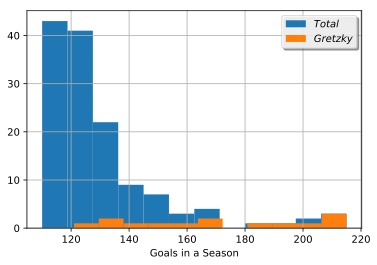

In [27]:
p[(p['PTS']>=110)].PTS.hist(bins=12)
p[(p['PTS']>=110)&(p['Name']=='Wayne Gretzky')].PTS.hist(bins=11)
plt.xlabel('Goals in a Season')

leg=['$Total$', '$Gretzky$']
plt.legend( leg, shadow=True, loc='upper right')

In [28]:
a = pd.Series(p['Nat'])
a=a.value_counts()

<function matplotlib.pyplot.show>

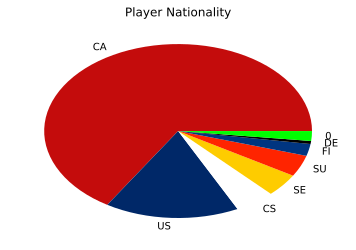

In [29]:
b=pd.Series(a[7:].sum())
c=a[:7]
d=c.append(b)
labels=d.index

colours=['#C40C0C','#002868','#FFFFFF','#FECC00','#FF2400','#003580','#000000','#00FF00']
plt.pie(d,labels=labels, colors=colours)
plt.title('Player Nationality')
plt.show

In [30]:
six= pd.Series(p['Nat'][:'1969-70'])
six=six.value_counts()

seven= pd.Series(p['Nat']['1970-71':'1979-80'])
seven=seven.value_counts()

eight= pd.Series(p['Nat']['1980-81':'1989-90'])
eight=eight.value_counts()

nine= pd.Series(p['Nat']['1990-91':'1999-00'])
nine=nine.value_counts()

naught= pd.Series(p['Nat']['2000-01':'2009-10'])
naught=naught.value_counts()

modern=pd.Series(p['Nat']['2010-11':])
modern=modern.value_counts()

dec=pd.DataFrame({'Total':a,'1960s':six,'1970s':seven,'1980s':eight,'1990s':nine,'2000s':naught,'2010s':modern},columns=['Total','1960s','1970s','1980s','1990s','2000s','2010s'])

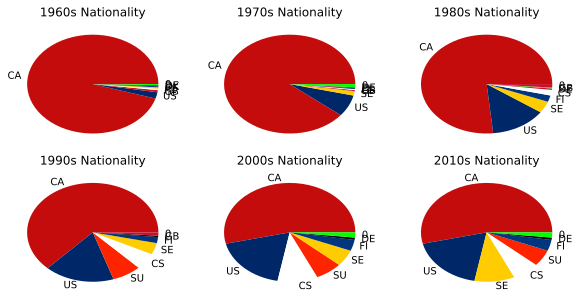

In [31]:
plt.figure(1, figsize=(10,5), dpi=100)

sixA=pd.Series(six[7:].sum())
sixB=six[:7]
sixB=sixB.append(sixA)
labels6=sixB.index

plt.figure(1)
plt.subplot(231)
colours6=['#C40C0C','#002868','#C8102E','#FFFFFF','#FECC00','#003580','#C60C30','#00FF00']
plt.pie(sixB,labels=labels6, colors=colours6)
plt.title('1960s Nationality')

sevenA=pd.Series(seven[7:].sum())
sevenB=seven[:7]
sevenB=sevenB.append(sevenA)
labels7=sevenB.index


plt.subplot(232)
colours7=['#C40C0C','#002868','#FECC00','#C8102E', '#FFFFFF','#003580','#C60C30','#00FF00']
plt.pie(sevenB, labels=labels7, colors=colours7)
plt.title('1970s Nationality')

eightA=pd.Series(eight[7:].sum())
eightB=eight[:7]
eightB=eightB.append(eightA)
labels8=eightB.index

plt.subplot(233)
colours8=['#C40C0C','#002868','#FECC00','#003580','#FFFFFF','#C60C30','#00FF00','#C8102E']
plt.pie(eightB, labels=labels8, colors=colours8)
plt.title('1980s Nationality')

nineA=pd.Series(nine[7:].sum())
nineB=nine[:7]
nineB=nineB.append(nineA)
labels9=nineB.index

plt.subplot(234)
colours9=['#C40C0C','#002868','#FF2400','#FFFFFF','#FECC00','#003580','#000000','#C8102E']
plt.pie(nineB, labels=labels9, colors=colours9)
plt.title('1990s Nationality')

naughtA=pd.Series(naught[7:].sum())
naughtB=naught[:7]
naughtB=naughtB.append(naughtA)
labels10=naughtB.index

plt.subplot(235)
colours10=['#C40C0C','#002868','#FFFFFF','#FF2400','#FECC00','#003580','#000000','#00FF00']
plt.pie(naughtB, labels=labels10, colors=colours10)
plt.title('2000s Nationality')

modernA=pd.Series(modern[7:].sum())
modernB=modern[:7]
modernB=modernB.append(modernA)
labels11=modernB.index

plt.subplot(236)
colours11=['#C40C0C','#002868','#FECC00','#FFFFFF','#FF2400','#003580','#000000','#00FF00']
plt.pie(naughtB, labels=labels11, colors=colours11)
plt.title('2010s Nationality')



In [32]:
dec.sort_values(by='Total', ascending=False).head(10)

,Total,1960s,1970s,1980s,1990s,2000s,2010s
CA,21139,824.0,3797.0,4783.0,4765.0,4245.0,2725.0
US,5174,18.0,302.0,858.0,1303.0,1449.0,1244.0
CS,1552,4.0,13.0,115.0,410.0,783.0,227.0
SE,1360,NaN,62.0,239.0,285.0,425.0,349.0
SU,1269,NaN,NaN,11.0,543.0,525.0,190.0
FI,710,1.0,13.0,132.0,149.0,285.0,130.0
DE,178,3.0,12.0,28.0,33.0,60.0,42.0
GB,87,6.0,15.0,18.0,35.0,13.0,NaN
CH,70,NaN,1.0,10.0,4.0,15.0,40.0
DK,59,3.0,3.0,NaN,NaN,13.0,40.0


<p>Notice the large influx of Soviet Union players in the 90s. The cold war ended in 1991.</p>

In [33]:
mp=p.groupby('Name')['PTS'].sum()
mg=p.groupby('Name')['G'].sum()
ma=p.groupby('Name')['A'].sum()
mpim=p.groupby('Name')['PIM'].sum()
mgp=p.groupby('Name')['GP'].sum()
l=pd.DataFrame({'pts': mp, 'goals': mg, 'assists':ma, 'pen':mpim,'gp':mgp},columns=['pts','goals','assists','pen','gp'])


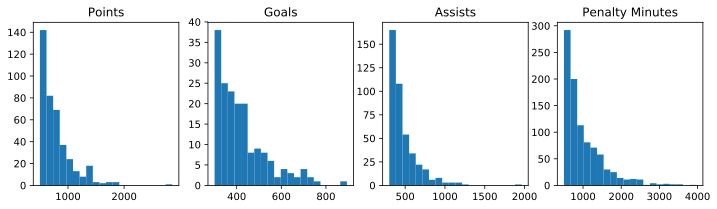

In [34]:
plt.figure(1, figsize=(12,3), dpi=100)
lp=l[(l['pts']>=500)].pts
lg=l[(l['goals']>=300)].goals
la=l[(l['assists']>=300)].assists
lpen=l[(l['pen']>=500)].pen


plt.subplot(141)
plt.hist(lp,bins=20)
plt.title('Points')

plt.subplot(142)
plt.hist(lg,bins=20)
plt.title('Goals')

plt.subplot(143)
plt.hist(la,bins=20)
plt.title('Assists')

plt.subplot(144)
plt.hist(lpen,bins=20)
plt.title('Penalty Minutes')

In [35]:
l.sort_values(by='pts', ascending=False).head(10)

,pts,goals,assists,pen,gp
Name,,,,,
Wayne Gretzky,2857,894,1963,577,1487
Mark Messier,1887,694,1193,1910,1756
Jaromir Jagr,1868,749,1119,1101,1629
Ron Francis,1798,549,1249,979,1731
Marcel Dionne,1771,731,1040,600,1348
Steve Yzerman,1755,692,1063,924,1514
Mario Lemieux,1723,690,1033,834,915
Joe Sakic,1641,625,1016,614,1378
Raymond Bourque,1579,410,1169,1141,1612


<p>Just a note Jagr passed Messier last year to take second all time and is still playing but he has commented that he thinks Gretzkys record is unreachable. He is currently 45.</p>

In [36]:
l.sort_values(by='pen', ascending=False).head(10)

,pts,goals,assists,pen,gp
Name,,,,,
Tiger Williams,513,241,272,3966,962
Dale Hunter,1020,323,697,3565,1407
Tie Domi,245,104,141,3515,1020
Marty McSorley,359,108,251,3381,961
Bob Probert,384,163,221,3300,935
Rob Ray,91,41,50,3207,900
Craig Berube,159,61,98,3149,1054
Tim Hunter,138,62,76,3146,815
Chris Nilan,225,110,115,3043,688


<p>Goes to show that you don't need to be the best to get in the record books.</p>

<h1>Thank you!</h1>